In [1]:
#import libaries
import pandas as pd
import numpy as np
import seaborn as sb
import math 
import operator


In [2]:
#read dataset
dataset=pd.read_csv("bank.csv",delimiter=';')

In [3]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
#show dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [5]:
#shows dataset columns
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
#describe dataset
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
#find missing value
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
dataset.shape

(4521, 17)

In [9]:
#replace yes, no into 1,0
dataset.replace(['yes','no'],[1,0],inplace=True)
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


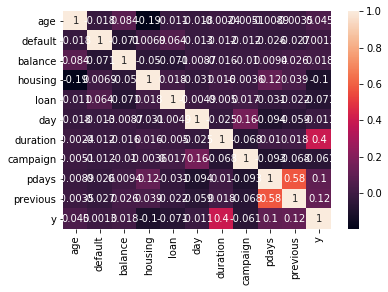

In [10]:
#find correlation
corr=dataset.corr()
sb.heatmap(corr,annot=True)

In [11]:
print(corr['y'].sort_values(ascending=False)[:]) #top 15 values
print('----------------------')
print(corr['y'].sort_values(ascending=False)[-5:]) #last 5 values

y           1.000000
duration    0.401118
previous    0.116714
pdays       0.104087
age         0.045092
balance     0.017905
default     0.001303
day        -0.011244
campaign   -0.061147
loan       -0.070517
housing    -0.104683
Name: y, dtype: float64
----------------------
default     0.001303
day        -0.011244
campaign   -0.061147
loan       -0.070517
housing    -0.104683
Name: y, dtype: float64


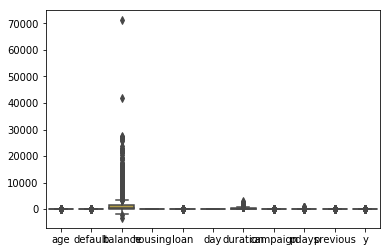

In [12]:
#plat boxplot
sb.boxplot(data = dataset)

In [13]:
dataset.shape

(4521, 17)

In [14]:
#show datatype
dataset.dtypes

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [15]:
# # convert into categorical dataset
# def categorical_data(dataset):
#     dataset=pd.get_dummies(dataset)
#     return dataset.head()
# dataset=categorical_data(dataset)
# dataset.shape
dataset=pd.get_dummies(dataset)
dataset.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,...,0,0,0,0,1,0,0,0,0,1
1,33,0,4789,1,1,11,220,1,339,4,...,0,0,1,0,0,0,1,0,0,0
2,35,0,1350,1,0,16,185,1,330,1,...,0,0,0,0,0,0,1,0,0,0
3,30,0,1476,1,1,3,199,4,-1,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,0,1,0,5,226,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


In [16]:
dataset.dtypes.head()

age        int64
default    int64
balance    int64
housing    int64
loan       int64
dtype: object

In [17]:
#feature scaling
def feature_scaling(dataset):
    for i in dataset.columns:
        dataset[i]=(dataset[i]-dataset[i].min())/(dataset[i].max()-dataset[i].min())
        return dataset
    
feature_scaling(dataset)
dataset.shape

(4521, 49)

In [18]:
#split data 
def split_train_test(dataset):
    train=len(dataset)*0.70
    train=int(train)
    test=len(dataset)-train
    test=int(test)
    train=dataset.head(train)
    test=dataset.tail(test)
    return train ,test

train,test=split_train_test(dataset)

In [19]:
train.shape,test.shape

((3164, 49), (1357, 49))

In [20]:
# separate test,train into train data and test data
def separate(dataset):
    output=dataset.y
    return dataset.drop('y',axis=1),output


train_x_data,train_y_data=separate(train)
test_x_data,test_y_data=separate(test)




In [21]:
train_x_data.shape,train_y_data.shape,test_x_data.shape,test_y_data.shape

((3164, 48), (3164,), (1357, 48), (1357,))

In [22]:
(pd.DataFrame(train)).dtypes.head()

age        float64
default      int64
balance      int64
housing      int64
loan         int64
dtype: object

In [23]:
import math
import operator


class KNN_1:
    def __init__(self):
        self.k=5
        
    
  
    def getNeighbors(self,x_train_data,y_train_data, x_test_data, k ):
        distances = []
#         print(type(x_test_data))
        length = len(x_test_data) - 1
#         print("len(x_test_data)",len(x_test_data))
        for x in range(len(x_train_data)):
            dist = self.EuclideanDistance(x_test_data, x_train_data[x], length)
            distances.append((y_train_data[x], dist))
#             print ("distances",distances)
        distances.sort(key=operator.itemgetter(1))
#         print ("sorted distances",distances)
        neighbors = []
#         print("neighborslist",neighbors)
        for x in range(k):
            neighbors.append(distances[x][0])
#             print("append neighbors with distances",neighbors)
        return neighbors
        
    
     #find the nearest distance using eculidean formula
    def EuclideanDistance(self,x_test_data,x_train_data,length):
        distance = 0
#         print(type(x_test_data), type(x_train_data), type(length), length)
        for i in range(length):
            distance += pow(x_test_data[i]-x_train_data[i],2)
#             print("EuclideanDistance is",distance)
        return math.sqrt(distance)

    
    def getResponse(self,neighbors):
        classVotes = {}
        for x in range(len(neighbors)):
            response = neighbors[x]
            if response in classVotes:
                classVotes[response] += 1
#                 print("classvotes",classVotes)
            else:
                classVotes[response] = 1
#                 print("classvotes1",classVotes)
        sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1),   reverse=True)
#         print("sortedVotes",sortedVotes)
        return sortedVotes[0][0]
    
    
    def getAccuracy(self,y_test_data, predictions):
        correct = 0
        for x in range(len(y_test_data)):
            if y_test_data[x] == predictions[x]:
                correct += 1
        return (correct/float(len(y_test_data))) * 100.0
def main():
    obj=KNN_1()
    
    
    #convert into array train and test data
    x_train_data=np.array(train_x_data[:2000])
    y_train_data=np.array(train_y_data[:2000])
    x_test_data=np.array(test_x_data[:50])
    y_test_data=np.array(test_y_data[:50]) 
#     x_train_data=np.reshape(len(x_train_data),1)
#     x_test_data=np.
    
    predictions=[]
    k = 3
    
    for i in range(len(x_test_data)):
#         print("len x train data",len(x_test_data[i]))
#         length of x_train data is 48
        neighbors =obj.getNeighbors(x_train_data, y_train_data,x_test_data[i], k )
        print("neighbors",neighbors)
        result = obj.getResponse(neighbors)
        print("result",result)
        predictions.append(result)
        print('predicted value=' + str(result) + ', actual_value=' + str(y_test_data[-1]))
        
    accuracy=obj.getAccuracy(y_test_data,predictions)
    print("final accuracy is:=",accuracy)
        
        
        
        
if __name__=='__main__':
    main()
        

neighbors [0, 0, 0]
result 0
predicted value=0, actual_value=0
neighbors [0, 0, 0]
result 0
predicted value=0, actual_value=0
neighbors [0, 0, 0]
result 0
predicted value=0, actual_value=0
neighbors [0, 0, 0]
result 0
predicted value=0, actual_value=0
neighbors [0, 0, 0]
result 0
predicted value=0, actual_value=0
neighbors [0, 0, 0]
result 0
predicted value=0, actual_value=0
neighbors [0, 0, 0]
result 0
predicted value=0, actual_value=0
neighbors [0, 0, 1]
result 0
predicted value=0, actual_value=0
neighbors [0, 0, 0]
result 0
predicted value=0, actual_value=0
neighbors [0, 0, 0]
result 0
predicted value=0, actual_value=0
neighbors [0, 0, 0]
result 0
predicted value=0, actual_value=0
neighbors [0, 0, 0]
result 0
predicted value=0, actual_value=0
neighbors [0, 0, 0]
result 0
predicted value=0, actual_value=0
neighbors [0, 0, 0]
result 0
predicted value=0, actual_value=0
neighbors [0, 0, 1]
result 0
predicted value=0, actual_value=0
neighbors [0, 0, 0]
result 0
predicted value=0, actual_